In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data
df=pd.read_csv('SuperMarket Analysis.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.shape

(1000, 17)

In [4]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.duplicated().sum()

0

In [7]:
df[(df['Branch']=='Alex') & (df['City']!='Yangon')]
# There is no brnach of the supermarket whose name is 'Alex' and which is not in city 'Yangon'

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [8]:
# merging date and time column into single column named DateTime
df['DateTime']=pd.to_datetime(df['Date']+' '+df['Time'],format='%m/%d/%Y %I:%M:%S %p')

In [9]:
df.drop(columns=['Date','Time','Branch'],inplace=True)

In [10]:
df=df[['Invoice ID','City','Customer type','Gender','DateTime','Product line','Unit price','Quantity','cogs','Tax 5%','Sales','gross margin percentage','gross income','Payment','Rating']]

In [11]:
# Renaming of column
df.rename(
    columns={
        'Tax 5%' : 'Tax',
        'Invoice ID' : 'Invoice_ID', 
        'Customer type' : 'Customer_type',
        'Product line' : 'Product_line',
        'Unit price' : 'Unit_price',
        'cogs' : 'Sales_price',
        'Sales' : 'Total_price',
        'gross income' : 'Profit'
    },inplace=True)

In [13]:
df.drop(columns=['gross margin percentage'],inplace=True)

In [14]:
df.sample()

,Invoice_ID,City,Customer_type,Gender,DateTime,Product_line,Unit_price,Quantity,Sales_price,Tax,Total_price,Profit,Payment,Rating
144,239-10-7476,Yangon,Normal,Female,2019-01-21 16:37:00,Home and lifestyle,77.95,6,467.7,23.385,491.085,23.385,Ewallet,8.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice_ID     1000 non-null   object        
 1   City           1000 non-null   object        
 2   Customer_type  1000 non-null   object        
 3   Gender         1000 non-null   object        
 4   DateTime       1000 non-null   datetime64[ns]
 5   Product_line   1000 non-null   object        
 6   Unit_price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Sales_price    1000 non-null   float64       
 9   Tax            1000 non-null   float64       
 10  Total_price    1000 non-null   float64       
 11  Profit         1000 non-null   float64       
 12  Payment        1000 non-null   object        
 13  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 109.5

## Univariate Analysis on Numerical Columns:

In [16]:
df[['Unit_price','Quantity','Sales_price','Tax','Total_price','Profit','Rating']].describe()

,Unit_price,Quantity,Sales_price,Tax,Total_price,Profit,Rating
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,307.58738,15.379369,322.966749,15.379369,6.97270
std,26.494628,2.923431,234.17651,11.708825,245.885335,11.708825,1.71858
min,10.080000,1.000000,10.17000,0.508500,10.678500,0.508500,4.00000
25%,32.875000,3.000000,118.49750,5.924875,124.422375,5.924875,5.50000
50%,55.230000,5.000000,241.76000,12.088000,253.848000,12.088000,7.00000
75%,77.935000,8.000000,448.90500,22.445250,471.350250,22.445250,8.50000
max,99.960000,10.000000,993.00000,49.650000,1042.650000,49.650000,10.00000


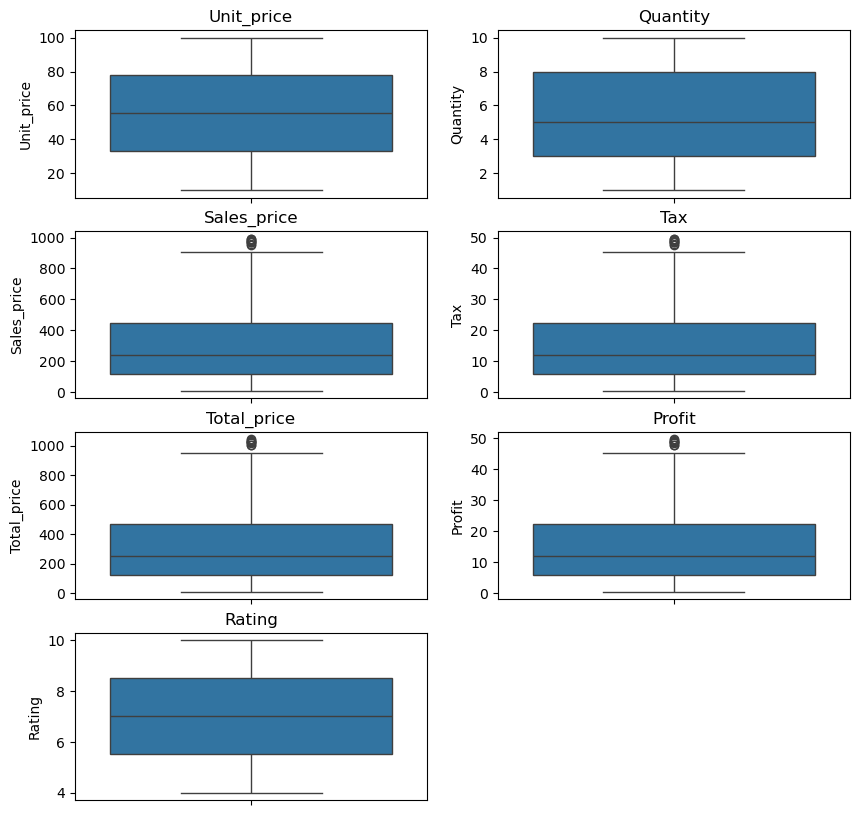

In [25]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(10,10))

sns.boxplot(data=df['Unit_price'],ax=ax[0][0])
ax[0][0].set_title('Unit_price')

sns.boxplot(data=df['Quantity'],ax=ax[0][1])
ax[0][1].set_title('Quantity')

sns.boxplot(data=df['Sales_price'],ax=ax[1][0])
ax[1][0].set_title('Sales_price')

sns.boxplot(data=df['Tax'],ax=ax[1][1])
ax[1][1].set_title('Tax')

sns.boxplot(data=df['Total_price'],ax=ax[2][0])
ax[2][0].set_title('Total_price')

sns.boxplot(data=df['Profit'],ax=ax[2][1])
ax[2][1].set_title('Profit')

sns.boxplot(data=df['Rating'],ax=ax[3][0])
ax[3][0].set_title('Rating')

ax[3][1].remove()


## Univariate Analysis on Categorical Columns:

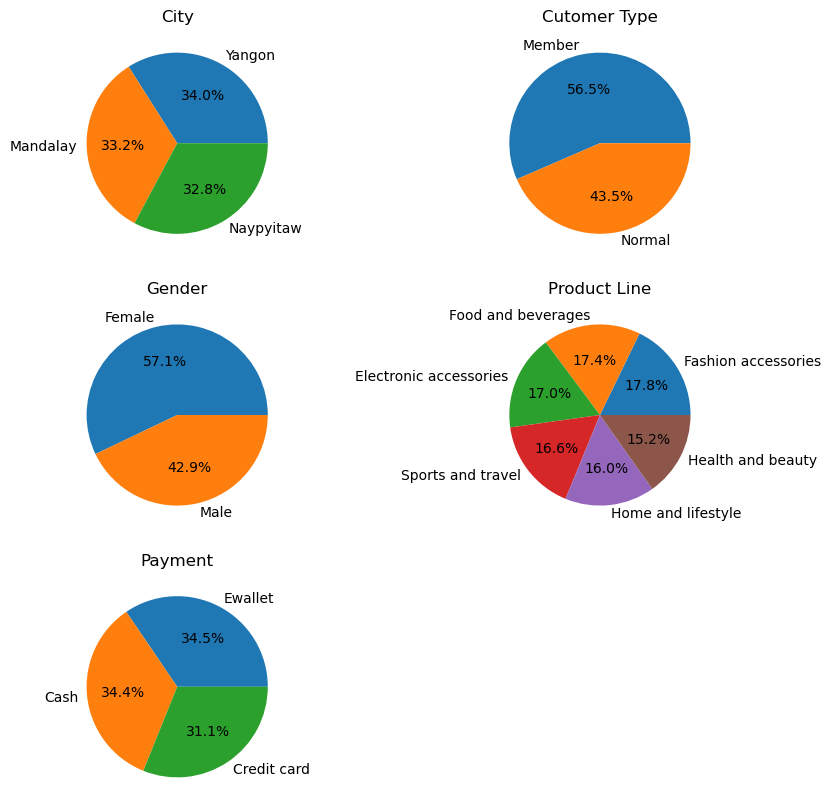

In [21]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(10,10))

df['City'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax[0][0])
ax[0][0].set_title('City')
ax[0][0].set_ylabel(' ')

df['Customer_type'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax[0][1])
ax[0][1].set_title('Cutomer Type')
ax[0][1].set_ylabel(' ')

df['Gender'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax[1][0])
ax[1][0].set_title('Gender')
ax[1][0].set_ylabel(' ')

df['Product_line'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax[1][1])
ax[1][1].set_title('Product Line')
ax[1][1].set_ylabel(' ')

df['Payment'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax[2][0])
ax[2][0].set_title('Payment')
ax[2][0].set_ylabel(' ')

ax[2][1].remove()

plt.show()

## Bivariate Analysis on Numerical-Categorical Columns:

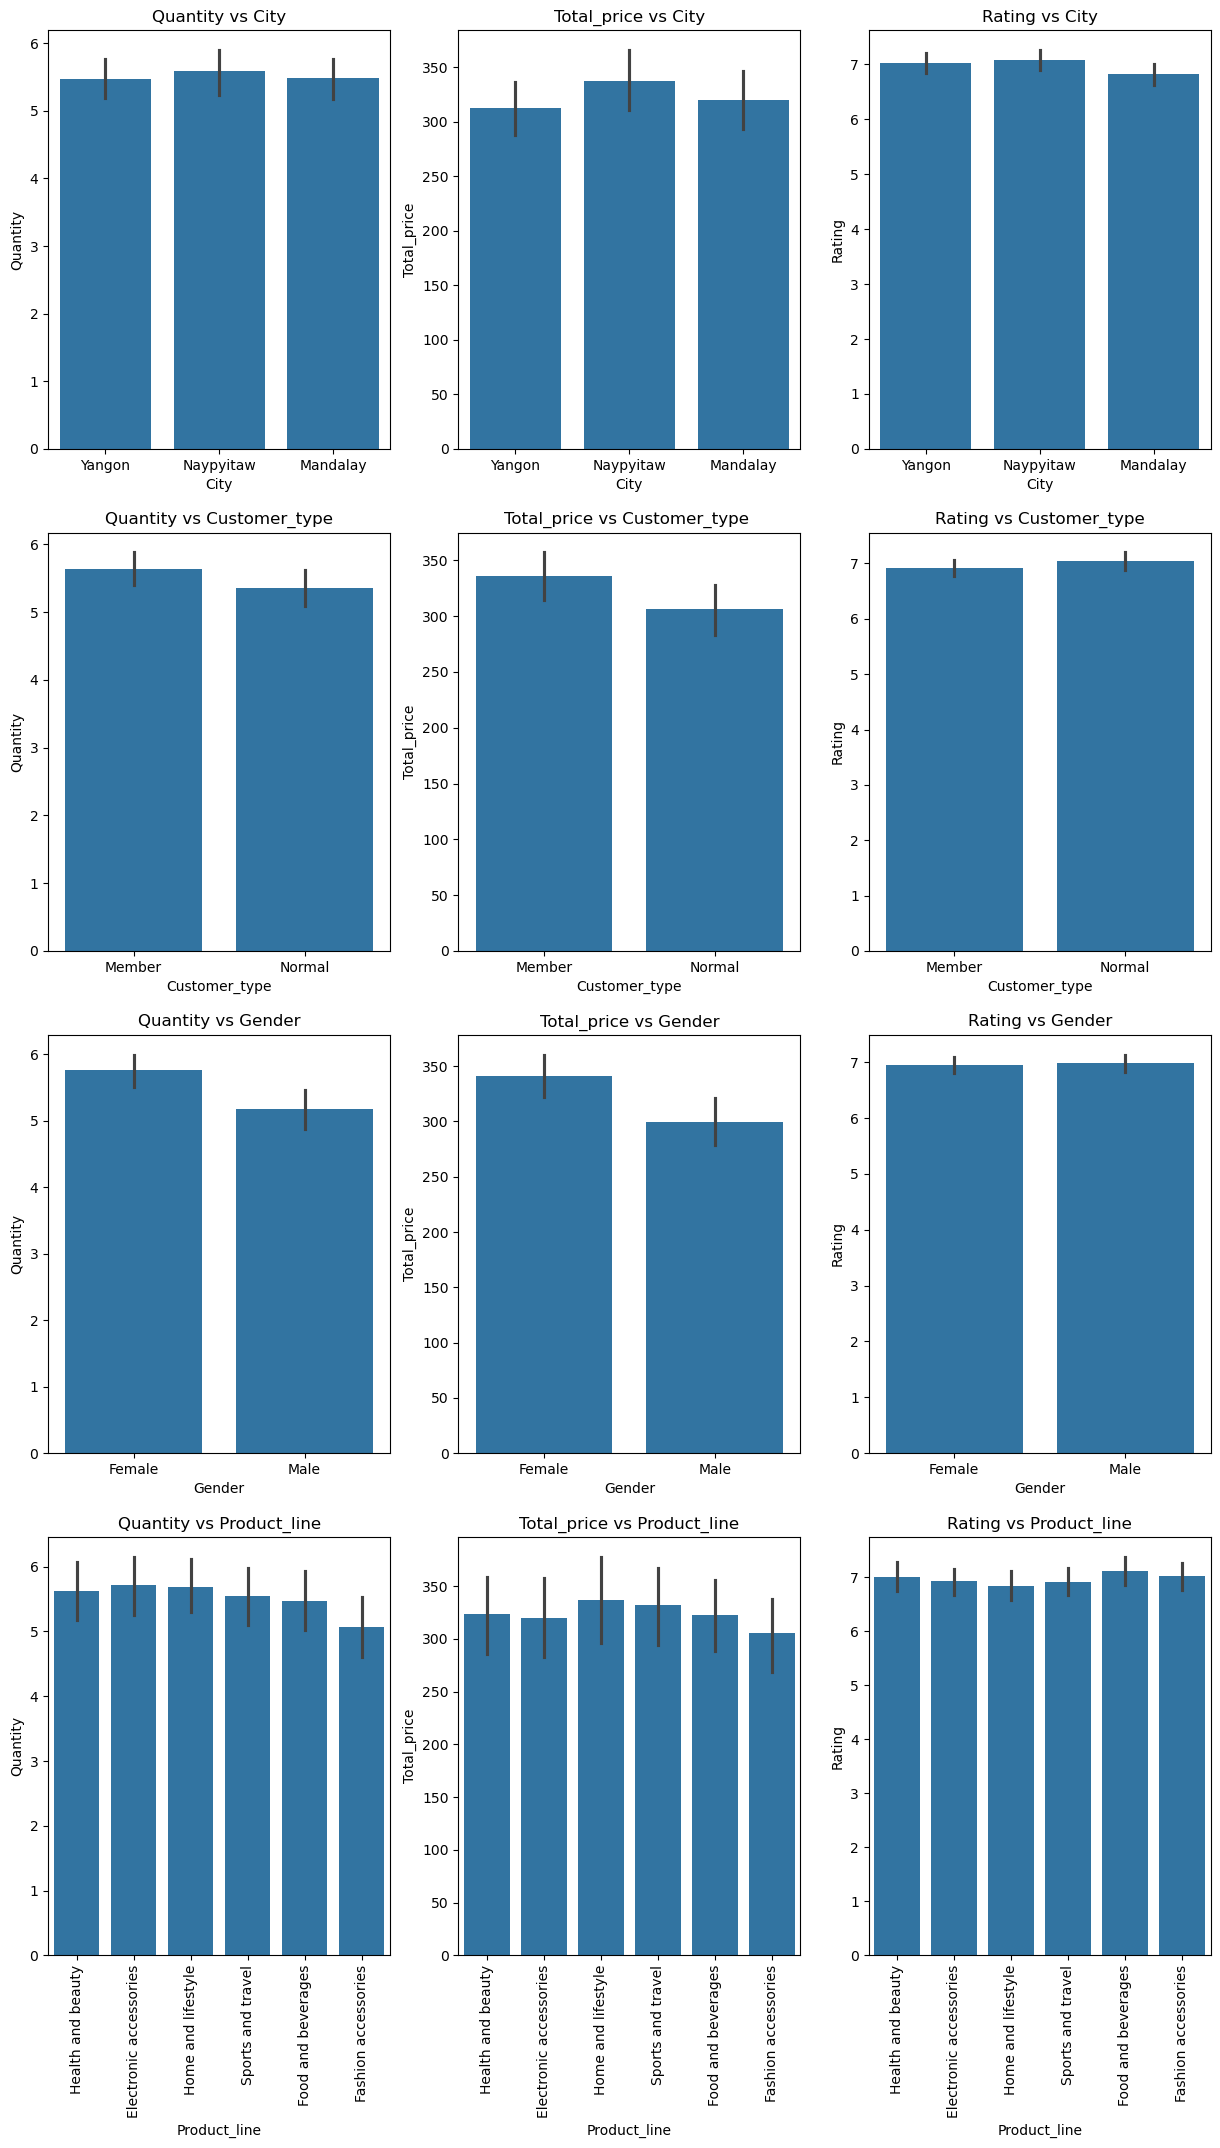

In [30]:
fig,ax=plt.subplots(nrows=4,ncols=3,figsize=(15,25))

sns.barplot(data=df,x=df['City'],y=df['Quantity'],ax=ax[0][0])
ax[0][0].set_title('Quantity vs City')

sns.barplot(data=df,x=df['City'],y=df['Total_price'],ax=ax[0][1])
ax[0][1].set_title('Total_price vs City')

sns.barplot(data=df,x=df['City'],y=df['Rating'],ax=ax[0][2])
ax[0][2].set_title('Rating vs City')

sns.barplot(data=df,x=df['Customer_type'],y=df['Quantity'],ax=ax[1][0])
ax[1][0].set_title('Quantity vs Customer_type')

sns.barplot(data=df,x=df['Customer_type'],y=df['Total_price'],ax=ax[1][1])
ax[1][1].set_title('Total_price vs Customer_type ')

sns.barplot(data=df,x=df['Customer_type'],y=df['Rating'],ax=ax[1][2])
ax[1][2].set_title('Rating vs Customer_type')

sns.barplot(data=df,x=df['Gender'],y=df['Quantity'],ax=ax[2][0])
ax[2][0].set_title('Quantity vs Gender')

sns.barplot(data=df,x=df['Gender'],y=df['Total_price'],ax=ax[2][1])
ax[2][1].set_title('Total_price vs Gender')

sns.barplot(data=df,x=df['Gender'],y=df['Rating'],ax=ax[2][2])
ax[2][2].set_title('Rating vs Gender')

sns.barplot(data=df,x=df['Product_line'],y=df['Quantity'],ax=ax[3][0])
ax[3][0].set_title('Quantity vs Product_line')

sns.barplot(data=df,x=df['Product_line'],y=df['Total_price'],ax=ax[3][1])
ax[3][1].set_title('Total_price vs Product_line')

sns.barplot(data=df,x=df['Product_line'],y=df['Rating'],ax=ax[3][2])
ax[3][2].set_title('Rating vs Product_line')

plt.sca(ax[3][0])
plt.xticks(rotation='vertical')

plt.sca(ax[3][1])
plt.xticks(rotation='vertical')

plt.sca(ax[3][2])
plt.xticks(rotation='vertical')
plt.show()

## Bivariate Analysis on Categorical Columns:

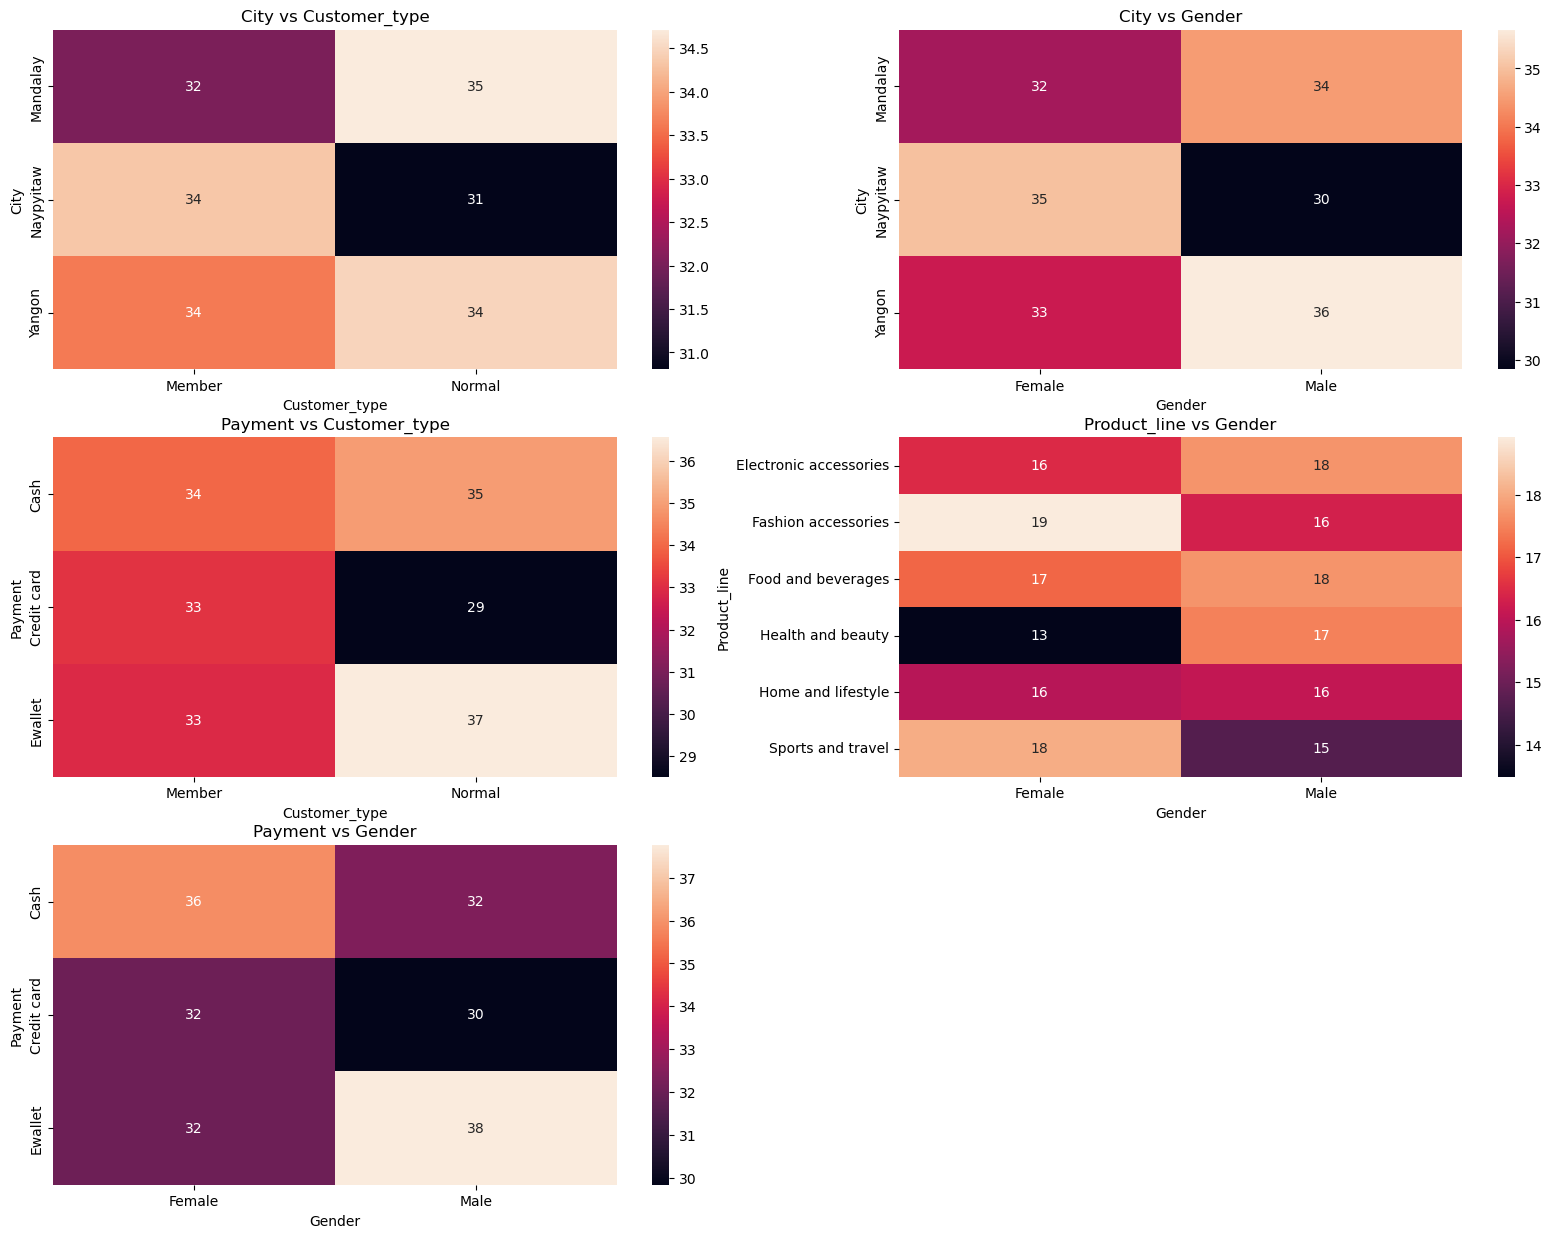

In [31]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,15))

sns.heatmap(pd.crosstab(df['City'],df['Customer_type'],normalize='columns')*100,annot=True,ax=ax[0][0])
ax[0][0].set_title('City vs Customer_type')

sns.heatmap(pd.crosstab(df['City'],df['Gender'],normalize='columns')*100,annot=True,ax=ax[0][1])
ax[0][1].set_title('City vs Gender')

sns.heatmap(pd.crosstab(df['Payment'],df['Customer_type'],normalize='columns')*100,annot=True,ax=ax[1][0])
ax[1][0].set_title('Payment vs Customer_type')

sns.heatmap(pd.crosstab(df['Product_line'],df['Gender'],normalize='columns')*100,annot=True,ax=ax[1][1])
ax[1][1].set_title('Product_line vs Gender')

sns.heatmap(pd.crosstab(df['Payment'],df['Gender'],normalize='columns')*100,annot=True,ax=ax[2][0])
ax[2][0].set_title('Payment vs Gender')

ax[2][1].remove()

## Data Analysis Objectives:

#### 1.

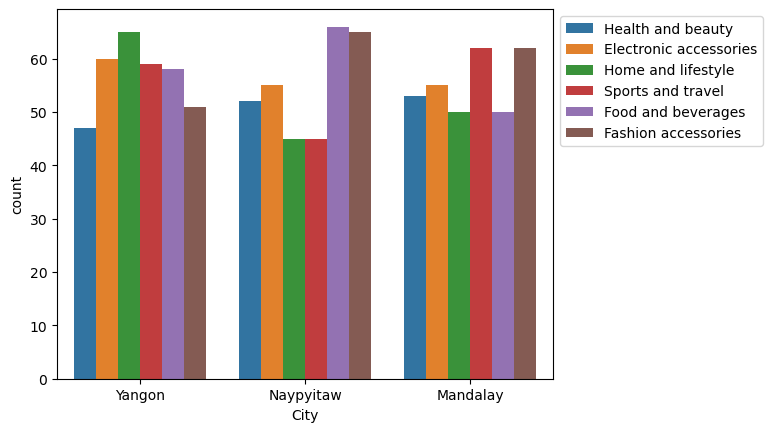

In [32]:
## Which products are sold the most in each city?
sns.countplot(data=df,x='City',hue='Product_line')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

#### 2.

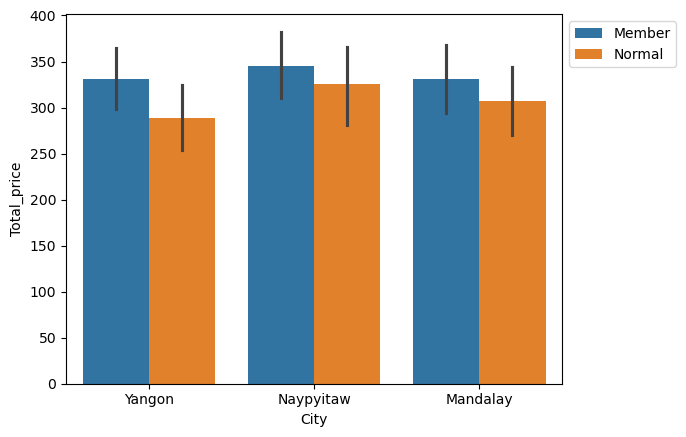

In [33]:
# What is the purchasing capacity (total_price) of Members and Non-members customers in each city?
sns.barplot(data=df,x='City',y='Total_price',hue='Customer_type')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

#### 3.

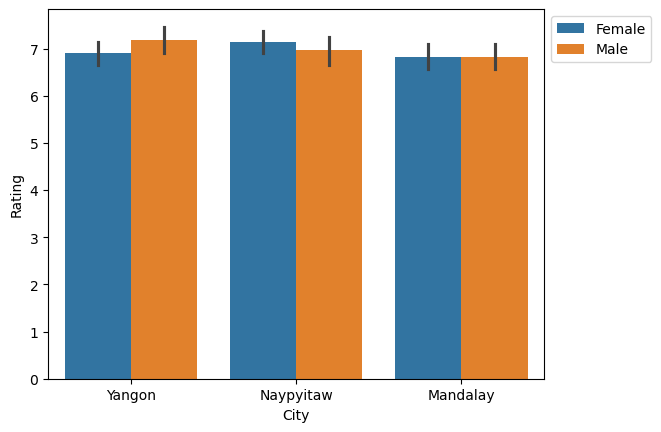

In [34]:
# Which gender gives the highest rating to the supermarket in each city?
sns.barplot(data=df,x='City',y='Rating',hue='Gender')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

#### 4.

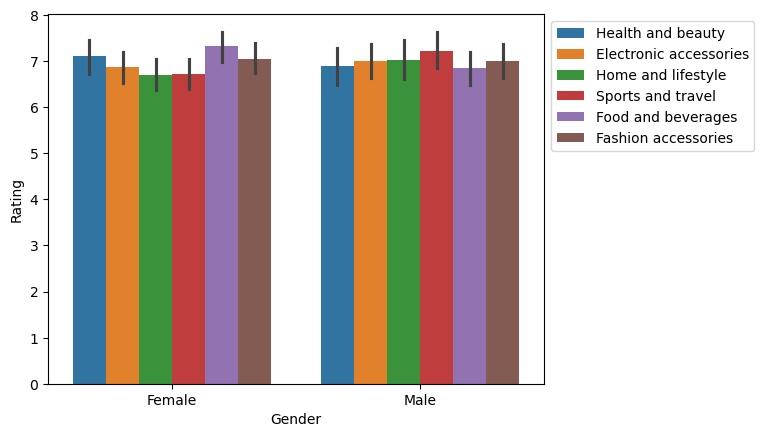

In [35]:
# Which product is highest rated among Male and Female customers?
sns.barplot(data=df,x='Gender',y='Rating',hue='Product_line')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

#### 5.

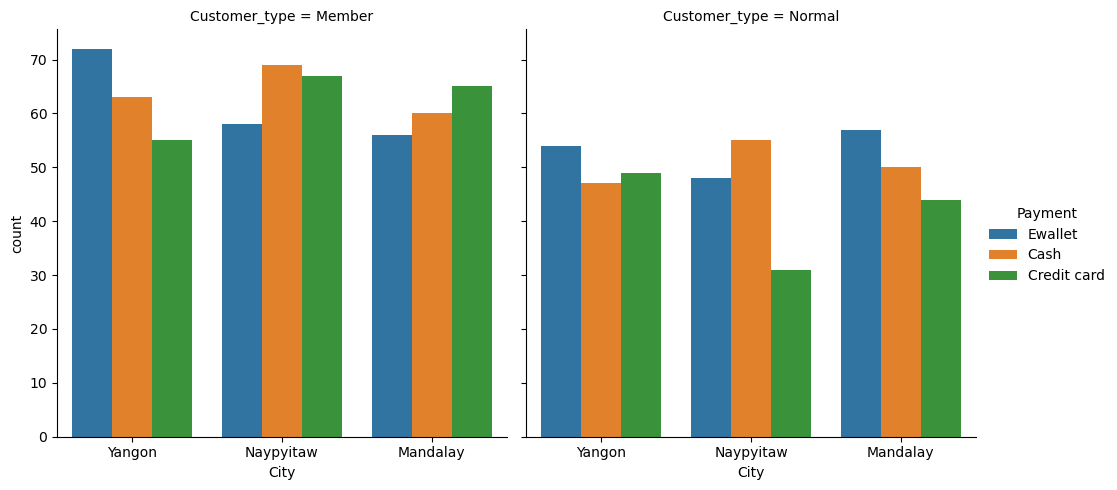

In [36]:
# Which payment method is popular among Members and Non-members customers in each city?
sns.catplot(data=df,x='City',kind='count',col='Customer_type',hue='Payment')
plt.show()

#### 6.

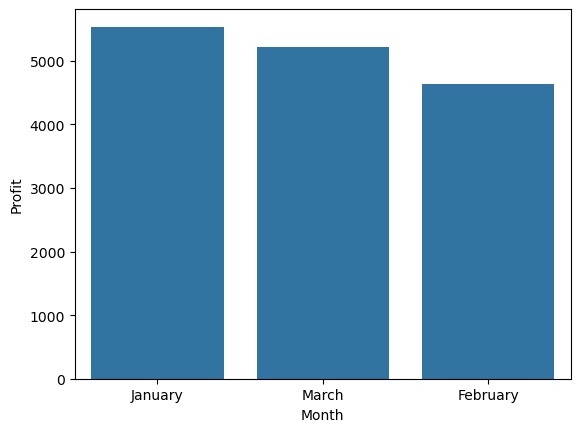

In [37]:
# Which month was most profitable for the supermarket?
df1=df.groupby(df['DateTime'].dt.month_name(),sort=False)['Profit'].sum().reset_index()
sns.barplot(data=df1,x='DateTime',y='Profit')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

#### 7. 

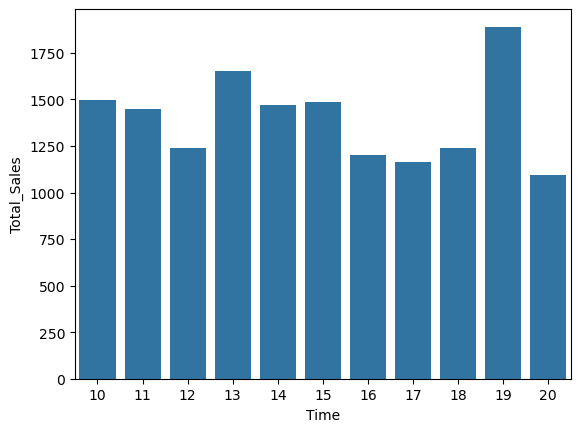

In [38]:
# What time has the highest sales over the entire time period of the sales?
df1=df.groupby(df['DateTime'].dt.hour,sort=False)['Profit'].sum().reset_index()
df1.rename(columns={'DateTime':'Hour'},inplace=True)
sns.barplot(data=df1,x='Hour',y='Profit')
plt.xlabel('Time')
plt.ylabel('Total_Sales')
plt.show()